# Learning Outcomes 
- Performing basis changes and measurements in other bases.
- Visualization of qubits and the action of single qubit quantum gates on Bloch sphere.
- Representing multiple qubit states using tensor products.
- Entangled states and interesting CNOT operations.

In [197]:
from qiskit import QuantumCircuit, Aer, assemble
from qiskit_textbook.tools import array_to_latex
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit_textbook.widgets import gate_demo
#array_to_latex(unitary, pretext="\\text{Circuit = }\n")

# Non-standard Basis

We call the basis $\{ |0 \rangle, |1 \rangle \} $ the standard, or computational basis. As you may have noticed this is the eigenbasis for $Z$ operator. When we call $\textit{measure()}$ method in Qiskit, we perform measurement in the computational basis. However, there are ways to perform measurements in other bases as well, kind of.


We define $\textit{sign basis}$, $|+\rangle,|-\rangle$ as follows:

$$ | + \rangle = \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}}  \end{bmatrix} $$

$$ | - \rangle = \begin{bmatrix} \frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}}  \end{bmatrix} $$

# Exercise 1

How can we perform a measurement in the sign basis using Qiskit? 

# Answer
Simply, we need to apply H gate before measurement.

Let's visualize the action of the single qubit gates we have learned so far to get a better understanding of this process.

In [198]:
gate_demo('pauli+h')

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

So Hadamard gate performs the following transformation:
$$ |0 \rangle \leftrightarrow |+ \rangle $$
$$ |1 \rangle \leftrightarrow |- \rangle $$

Therefore, if we apply a $H$ gate just before the measurement, we will practically be measuring with respect to the sign basis.

# Exercise 2

Write a function that takes in a QuantumCircuit and performs a measurement in the sign basis on all the qubits.

In [199]:
def sign_measure_all(qc):
    '''
        Adds a measurement gate in sign basis to all qubits.
    '''
    for i in range(qc.num_qubits):
        qc.h(i)
    qc.measure_all()
    
    

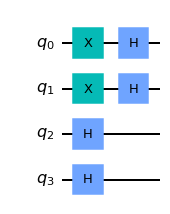

In [200]:
qc = QuantumCircuit(4)
# Let's transform our qubits to the state |++-->
# all qubits are initialized to |0> state, so we must transform the first two qubits to |1> 
# state before transforming all of them to the sign basis.
qc.x([0,1])
qc.h([0,1,2,3])
qc.draw()

In [201]:
qasmsim = Aer.get_backend('qasm_simulator')
unisim = Aer.get_backend('unitary_simulator')
svsim = Aer.get_backend('statevector_simulator')

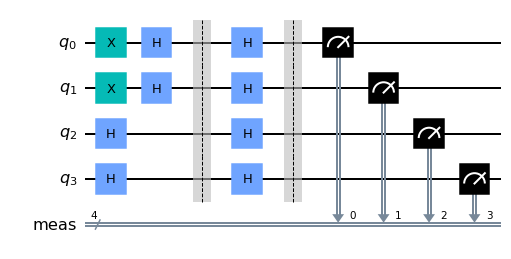

In [202]:
# Let's see if the function is working
qc.barrier()
sign_measure_all(qc)
qc.draw()

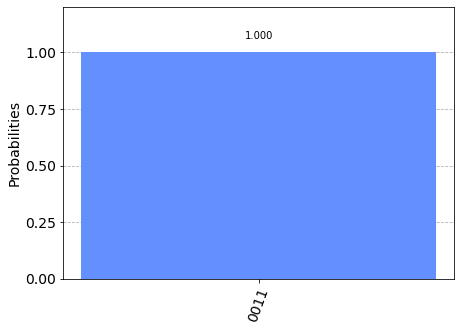

In [203]:
counts = qasmsim.run(assemble(qc),shots=1000).result().get_counts()
plot_histogram(counts)

# Exercise 3

Write a function that takes in a QuantumCircuit and performs a measurement in the y basis on all the qubits.

In [204]:
def y_measure_all(qc):
    '''
        Adds a measurement gate in Y-basis to all qubits.hes
        how can you change 0 to y and 1 to -y
    '''
    nqbits = qc.num_qubits
    
    for i in range (nqbits):
        qc.h(i) # initilization of state
        qc.sdg(i) # apply S^dagger 
        qc.h(i) # apply Hadamard gate
    qc.measure_all()


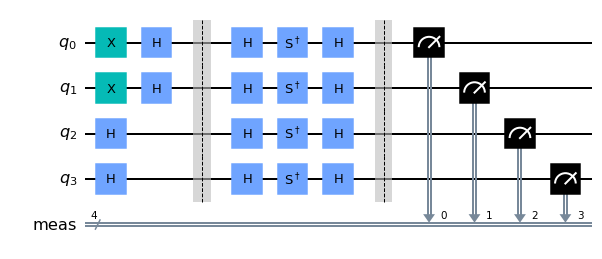

In [205]:
qc = QuantumCircuit(4)
qc.x([0,1])
qc.h([0,1,2,3])
qc.barrier()
y_measure_all(qc)
qc.draw()


In [206]:
gate_demo()

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

# Exercise 3.2 

Write a function that takes in a quantum circuit with two qubits and performs a measurement in the following basis:

$$ | \Psi^+ \rangle = \frac{1}{\sqrt{2}} | 00 \rangle + \frac{1}{\sqrt{2}} | 11 \rangle $$

In [207]:
def bell_measurement(qc):
    '''
        Adds a measurement in Bell basis to qc.
        Hint: Do you remember how we initialized this state? 
    '''
    qc.cx(0,1)
    qc.h(0)
    qc.measure_all()


In [208]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
bell_measurement(qc)
counts = qasmsim.run(assemble(qc),shots=1000).result().get_counts()
if counts == {'00':1000}:
    print("welldone!")
else:
    print("Your function is not running properly.")

welldone!


# Multiple Qubit States

We can represent any single qubit pure quantum state as:

$$ |\Psi \rangle = \alpha | 0 \rangle + \beta | 1 \rangle $$

How do we represent multiple qubit pure quantum states? 
We use tensor products. For example, if we have a two qubit quantum state, then there are four possible state for our qubits. Namely, {00,01,10,11}. We represent an arbitrary superposition as:

$$ |q_1 \rangle \otimes | q_2 \rangle = a_{00}|00 \rangle + a_{01}|01 \rangle + a_{10}|10 \rangle + a_{11}|11 \rangle   = \begin{bmatrix} a_{00} \\ a_{01} \\ a_{10} \\ a_{11}\end{bmatrix} $$


# Exercise 4

If we have n qubits, what is the dimension of a statevector in this Hilbert space?


# Answer 

# $$   2^n $$

One good thing about using little-endian representation, the one which Qiskit uses, is that we can consider each bitstring as representing a decimal number and the corresponding index will simply be this number. For example, when we are asked how can we get the amplitude of $|010\rangle$ state in a given statevector, we can simply check $2^{nd}$ element of the statevector.

# Exercise 5

Let's say we are representing each amplitude with a complex number in Python, and each complex number takes up 80 Bytes of memory. Then, how many bytes do we need to represent a quantum state describing a quantum circuit with 10 qubits?

# Answer

$$ 80 bytes * 2^{10} = 0.082Mb $$


# Exercise 6

Let's say we are trying to simulate the action of a Hamiltonian on a large quantum system, and let's say this Hamiltonian acts on 30 qubits. Let's say we are using something like C, instead of Python, to make a better use of the memory. Therefore, let's say each complex number requires not 80 Bytes, but simply 8 bytes. Then answer the following questions:
- What is the size of a statevector in this Hilbert space?
- What are the dimensions of the Hamiltonian matrix ?
- How many bytes are required to represent a statevector ? Is it of the order of Megabytes,Gigabytes, or something else ?
- How many bytes are required to represent the Hamiltonian matrix assuming that we need a complex number for each element in the matrix ? Is it of the order of Megabytes, Gigabytes, or something else ?
- Can you store both the Hamiltonian matrix and the statevector in your own computer?

# Answers
- $$ 2^{30} \times 1 $$
- $$ 2^{30} \times 2^{30} $$
- $$ 2^{30} \times 8 bytes = 8.58993459GB $$
- $$ 2^{30} \times 2^{30} \times 8 bytes= 9.22337204 ExaBytes$$
- No way... 


Answering the questions above should give you a clear idea about the computing power of a quantum computer, and why we can't simply use classical computers to simulate them.

# Product and Entangled States

Not all multiple qubit states can be represented as tensor products. For example, let's take the following state:

$$ | \Phi^+ \rangle = \frac{1}{\sqrt{2}} | 00 \rangle + \frac{1}{\sqrt{2}} | 11 \rangle  $$ 

We can't write it down as a tensor product of two states. We can make a proof by contraction to prove this. Let's assume that we can actually write it down:

$$ | \Phi^+ \rangle = (a_0 |0 \rangle + a_1 |1 \rangle ) \otimes (b_0 | 0 \rangle + b_1 |1 \rangle) $$

Since the tensor product operator is a linear operator, we can distribute it:

$$ \frac{1}{\sqrt{2}} | 00 \rangle + \frac{1}{\sqrt{2}} | 11 \rangle = a_0 b_0 |00 \rangle + a_0 b_1 |01 \rangle + a_1 b_0 | 10 \rangle + a_1 b_1 | 11 \rangle $$ 

Well, the coefficients should be the same for both states since they are equal. If we try to equate the coefficient of $ | 01 \rangle $ to zero we get the following logical chains:

$$ a_0 \neq 0  \rightarrow b_1 = 0 \rightarrow \text{coeff of } |11 \rangle = 0$$

$$ b_1 \neq 0 \rightarrow  a_0 = 0 \rightarrow \text{coeff of } |00 \rangle = 0 $$

Which entails a contradiction, implying that our inital assumption that $| \Phi^+ \rangle$ could be written as tensor product of two states.

# Exercise 7

Write the following state as the tensor product of two states:

$$ | \Psi \rangle = \frac{1}{\sqrt{2}} | 00 \rangle + \frac{i}{\sqrt{2}} | 01 \rangle $$  

# Answer

$$ (a_0 |0 \rangle + a_1 |1 \rangle ) \otimes (b_0 | 0 \rangle + b_1 |1 \rangle) $$
$$ (a_0 b_0 |00 \rangle + a_0 b_1 |01 \rangle ) + (a_1 b_0  | 10 \rangle + a_1 b_1 |11 \rangle) $$
$$ (|0 \rangle ) \otimes (\frac{1}{\sqrt{2}}| 0 \rangle +\frac{i}{\sqrt{2}} |1 \rangle) $$


# Exercise 8

Is it possible to write down the following state as the tensor product of three quantum states? If yes, prove that that can't be the case. If no, show that it can be the case. 

$$ | W \rangle = \frac{1}{\sqrt{2}} | 000 \rangle + \frac{1}{\sqrt{2}} | 111 \rangle $$ 

# Answer 

It is entanged so it cant be decomposable
Proof:
$$ | W \rangle = \frac{1}{\sqrt{2}} | 000 \rangle + \frac{1}{\sqrt{2}} | 111 \rangle $$
$$| W \rangle = a_0 b_0 c_0|000 \rangle + a_0 b_0 c_1|001 \rangle +a_0 b_1 c_0|010 \rangle + a_1 b_0 c_0|100 \rangle + a_0 b_1 c_1|011 \rangle + a_1 b_0 c_1|101 \rangle + a_1 b_1 c_0|110 \rangle  + a_1 b_1 c_1|111 \rangle$$ 
$$ a_0*b_0 \neq 0  \rightarrow c_1 = 0 \rightarrow \text{coeff of } |111 \rangle = 0$$
$$ a_0*c_0 \neq 0  \rightarrow b_1 = 0 \rightarrow \text{coeff of } |111 \rangle = 0$$
$$ b_0*c_0 \neq 0  \rightarrow a_1 = 0 \rightarrow \text{coeff of } |111 \rangle = 0$$
$$ a_1*b_1 \neq 0  \rightarrow c_0 = 0 \rightarrow \text{coeff of } |000 \rangle = 0$$
$$ a_1*c_1 \neq 0  \rightarrow b_0 = 0 \rightarrow \text{coeff of } |000 \rangle = 0$$
$$ b_1*c_1 \neq 0  \rightarrow a_0 = 0 \rightarrow \text{coeff of } |000 \rangle = 0$$

So, it is contradiction.



We can use tensor products to represent the action of a set of quantum gates on qubits as well. For example, if we have the following circuit:

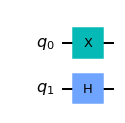

In [209]:
qc=QuantumCircuit(2)
qc.x(0)
qc.h(1)
qc.draw()

We can represent the action of these two gates as:

$$ H \otimes X $$ 

Again, careful with the little-endian representation!

# Exercise 9

Let's say we have the following quantum circuit. How can we represent it as a tensor product?


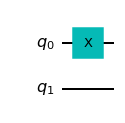

In [210]:
qc=QuantumCircuit(2)
qc.x(0)
qc.draw()

# Answer
$$ X \otimes I $$ 


# CNOT Gate

We define the action of CNOT, or CX, gate as applying an X gate to the target qubit when the control qubit is in $| 1 \rangle $ state.

$$ CNOT(1,0) |00\rangle = |00 \rangle, \quad  CNOT(1,0) |01 \rangle = |01 \rangle $$
$$ CNOT(1,0) |10\rangle = |11 \rangle, \quad  CNOT(1,0) |11 \rangle = |10 \rangle $$

Note that CNOT gate is mainly used for creating entanglement between two qubits. But it does not create entanglement on all the cases.

# Exercise 10

We define CY gate just like we defined CX gate, it applies a Y gate to the target qubit when the control qubit is in state $| 1 \rangle $. 

- Write down the action of $CY(1,0), 1^{st}$ qubit is the control, $0^{th}$ qubit is the target qubit, on the two dimensional computational basis states, $\{ |00\rangle,|01\rangle,|10\rangle,|11\rangle \}$ 
- Construct the matrix for $CY(1,0)$ gate. 

# Answer

$$ CY(1,0) |00\rangle = |00\rangle, \quad  CY(1,0) |01 \rangle = |01\rangle $$
$$ CY(1,0) |10\rangle = i|11\rangle, \quad  CY(1,0) |11 \rangle = -i|11\rangle $$

$$ CY(1,0) = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 
                             0 & 1 & 0 & 0 \\
                             0 & 0 & 0 & -i \\
                             0 & 0 & i & 0 \end{bmatrix}$$


$CNOT$ gate is one of the most powerful tools in quantum computation. Combining $CNOT$ gate with some basic single qubit gates, we can aproximate any unitary transformation into a set of gates up to arbitrary error. This provides a way for us to prove that quantum computation can perform any computation a classical computer can. It also makes way for some interesting homework questions as well!

# Exercise 11

Let's define a more interesting $CX$ gate, call it $C0X$ gate. It acts just like a $CX$ gate, but kind of in reverse. That is, $C0X$ applies an $X$ gate to the target qubit when the control qubit is in $|0\rangle$ state. 
- Write down the action of $C0X(1,0)$ gate on basis states.
- Write down the matrix representation for $C0X(1,0)$ gate.
- Write down a function that takes in a QuantumCircuit, a control and a target qubit index, and applies a $C0X$ gate. Hint: You can do this using $X$ and $CNOT$ gates.


# Answer
$$ C0X(1,0) |00\rangle = |01\rangle, \quad  C0X(1,0) |01 \rangle = |00\rangle $$
$$ C0X(1,0) |10\rangle = |10\rangle, \quad  C0X(1,0) |11 \rangle = |11\rangle $$

$$ C0X(1,0) = \begin{bmatrix}0 & 1 & 0 & 0 \\ 
                             1 & 0 & 0 & 0 \\
                             0 & 0 & 1 & 0 \\
                             0 & 0 & 0 & 1 \end{bmatrix}$$

In [211]:
def c0x(qc,c,t):
    '''
    Args:
        qc: QuantumCircuit
        c : control qubit index
        t : target qubit index
    Returns:
        Applies a c0x(c,t) gate to the circuit, returns nothing.
    '''
    
    
    qc.cx(c,t)
    qc.x(t)
        
        


In [212]:
# You can test your function by calling this cell, then comparing the printed matrix with the 
# matrix representation you found in the previous part.
from numpy.random import randint
from random import sample
qc = QuantumCircuit(2)
c0x(qc,1,0)
from qiskit import Aer,assemble
from qiskit_textbook.tools import array_to_latex
unisim = Aer.get_backend('unitary_simulator')
unitary = unisim.run(assemble(qc)).result().get_unitary()
array_to_latex(unitary,pretext="C0X(1,0)= ")

<IPython.core.display.Math object>

# Exercise 12

Let's define a way more interesting controlled gate, we call it $C0H$ gate. It acts just like a $C0X$ gate, but instead of applying an $H$ gate to the target qubit when the control qubit is in state $|0\rangle$, it applies a $H$ gate.  
- Write down the action of $C0H(1,0)$ gate on basis states. For simplification purposes, I suggest you to use $|+\rangle$ and $|-\rangle$. 
- Write down the matrix representation for $C0H(1,0)$ gate.
- Write down a function that takes in a QuantumCircuit, a control and a target qubit index, and applies a $C0H$ gate. 



# Answer

$$ C0H(1,0) |00\rangle = \frac{1}{\sqrt{2}} (|00 \rangle + |01 \rangle), \quad  C0H(1,0) |01 \rangle = 
\frac{1}{\sqrt{2}} (|00 \rangle - |01 \rangle) $$
$$ C0H(1,0) |10\rangle = |10\rangle, \quad  C0H(1,0) |11 \rangle = |11\rangle $$

$$ C0H(1,0) = \begin{bmatrix}\frac{1}{\sqrt{2}}  & \frac{1}{\sqrt{2}} & 0 & 0 \\ 
                             \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} & 0 & 0 \\
                             0 & 0 & 1 & 0 \\
                             0 & 0 & 0 & 1 \end{bmatrix}$$

In [235]:
def c0h(qc,c,t):
    '''
    Args:
        qc: QuantumCircuit
        c : control qubit index
        t : target qubit index
    Returns:
        Applies a c0x(c,t) gate to the circuit, returns nothing.
    '''
    qc.ry(+pi/4,t)
    qc.cx(c,t)
    qc.ry(-pi/4,t)
    qc.ry(pi/2,t)
    qc.x(t)


In [236]:
# You can test your function by calling this cell, then comparing the printed matrix with the 
# matrix representation you found in the previous part.
from numpy.random import randint
from numpy import pi
from random import sample
qc = QuantumCircuit(2)
c0h(qc,1,0)
from qiskit import Aer,assemble
from qiskit_textbook.tools import array_to_latex
unisim = Aer.get_backend('unitary_simulator')
unitary = unisim.run(assemble(qc)).result().get_unitary(qc)
array_to_latex(unitary,pretext="C0H(1,0)= ")

<IPython.core.display.Math object>

# Exercise 13

Given an arbitrary unitary transformation $U$, can we construct its controlled version using only single qubit gates and a CNOT ? Please explain your reasoning tentatively.


# Answer



In [237]:
Yes we can, because of the Universality of the Quantum Operators

Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/IPython/core/compilerop.py", line 101, in ast_parse
    return compile(source, filename, symbol, self.flags | PyCF_ONLY_AST, 1)
  File "<ipython-input-237-d857d3b31362>", line 1
    Yes we can, because of the Universality of the Quantum Operators
        ^
SyntaxError: invalid syntax

Use %tb to get the full traceback.
